In [1]:
import mlflow
from camelyon.log_ops import TRACKING_URI

mlflow.set_tracking_uri(TRACKING_URI)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

AUPRC_Attention Induction v.s. AUPRC_Rank Induction: Mann-Whitney-Wilcoxon test smaller, P_val=1.287e-02 U_stat=2.000e+01
Accuracy_Base v.s. Accuracy_Attention Induction: Mann-Whitney-Wilcoxon test smaller, P_val=7.023e-01 U_stat=5.650e+01
Accuracy_Attention Induction v.s. Accuracy_Rank Induction: Mann-Whitney-Wilcoxon test smaller, P_val=1.694e-03 U_stat=1.100e+01
AUROC_Base v.s. AUROC_Attention Induction: Mann-Whitney-Wilcoxon test smaller, P_val=5.151e-01 U_stat=5.000e+01
AUROC_Attention Induction v.s. AUROC_Rank Induction: Mann-Whitney-Wilcoxon test smaller, P_val=3.201e-02 U_stat=2.500e+01
AUPRC_Base v.s. AUPRC_Attention Induction: Mann-Whitney-Wilcoxon test smaller, P_val=5.451e-01 U_stat=5.100e+01
Accuracy_Base v.s. Accuracy_Rank Induction: Mann-Whitney-Wilcoxon test smaller, P_val=3.706e-02 U_stat=2.600e+01
AUPRC_Bas

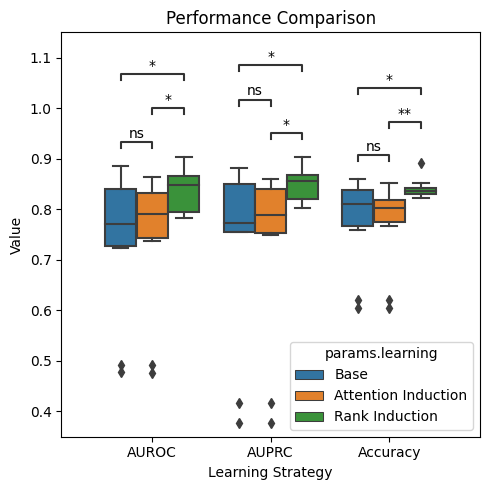

In [2]:
import seaborn as sns
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
from statannot import add_stat_annotation

base_rows = mlflow.search_runs(
    experiment_names=["attention_induction"], 
    filter_string=(
        "params.learning = 'base' "
        "AND params.sampling_ratio = '1.0' "
        # "AND params.morphology_value = 'None'"
    )
)
att_rows = mlflow.search_runs(
    experiment_names=["attention_induction"], 
    filter_string=(
        "params.learning = 'attention_induction' "
        "AND params.sampling_ratio = '1.0' "
        "AND params._lambda = '1.0' "
        "AND params.threshold = 'None' "
        # "AND params.morphology_value = 'None'"
    )
)
ltr_rows = mlflow.search_runs(
    experiment_names=["attention_induction"], 
    filter_string=(
        "params.learning = 'ltr' "
        "AND params.sampling_ratio = '1.0' "
        "AND params._lambda = '1.0' "
        "AND params.threshold = '1.0' "
        # "AND params.morphology_value = 'None' "
    )
)
data = pd.concat([base_rows, att_rows, ltr_rows])
data = data.loc[data["params.morphology_value"].isna()]

learning_strategy_map = {
    "base": "Base", 
    "attention_induction": "Attention Induction", 
    "ltr": "Rank Induction"
}
data['params.learning'] = data['params.learning'].map(learning_strategy_map)

data_view = data[["metrics.test_auroc", "metrics.test_prauc", "params.learning" ,"metrics.test_accuracy"]]
df_melted = data_view.melt(id_vars=["params.learning"], var_name="metric", value_name="value")
df_melted["metric"] = df_melted["metric"].str.replace("metrics.", "", regex=False)
df_melted["metric"] = df_melted["metric"].replace({
    "test_auroc": "AUROC", 
    "test_prauc": "AUPRC", 
    "test_accuracy": "Accuracy"
})

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.boxplot(data=df_melted, x="metric", y="value", hue="params.learning", ax=ax)

ax.set_xlabel("Learning Strategy")
ax.set_ylabel("Value")

# 필요하다면 타이틀 추가 가능
plt.title("Performance Comparison")


box_pairs = [
    (("AUROC", "Attention Induction"), ("AUROC", "Base")),
    (("AUROC", "Attention Induction"), ("AUROC", "Rank Induction")),
    (("AUROC", "Base"), ("AUROC", "Rank Induction")),
    (("AUPRC", "Attention Induction"), ("AUPRC", "Base")),
    (("AUPRC", "Attention Induction"), ("AUPRC", "Rank Induction")),
    (("AUPRC", "Base"), ("AUPRC", "Rank Induction")),
    (("Accuracy", "Attention Induction"), ("Accuracy", "Base")),
    (("Accuracy", "Attention Induction"), ("Accuracy", "Rank Induction")),
    (("Accuracy", "Base"), ("Accuracy", "Rank Induction"))
]

add_stat_annotation(ax, 
    data=df_melted, 
    x="metric", 
    y="value", 
    hue="params.learning", 
    box_pairs=box_pairs, 
    test="Mann-Whitney-ls",
    text_format="star",
    loc="inside", 
    verbose=2,
    comparisons_correction=None  # 다중 비교 보정 제거
)

plt.tight_layout()
plt.show()

AUPRC_Attention Induction w/ threshold v.s. AUPRC_Rank Induction: Mann-Whitney-Wilcoxon test two-sided, P_val=3.148e-01 U_stat=2.400e+01
Accuracy_Base v.s. Accuracy_Attention Induction w/ threshold: Mann-Whitney-Wilcoxon test two-sided, P_val=4.051e-01 U_stat=2.600e+01
Accuracy_Attention Induction w/ threshold v.s. Accuracy_Rank Induction: Mann-Whitney-Wilcoxon test two-sided, P_val=2.986e-01 U_stat=2.400e+01
AUROC_Base v.s. AUROC_Attention Induction w/ threshold: Mann-Whitney-Wilcoxon test two-sided, P_val=3.638e-01 U_stat=2.500e+01
AUROC_Attention Induction w/ threshold v.s. AUROC_Rank Induction: Mann-Whitney-Wilcoxon test two-sided, P_val=6.691e-01 U_stat=3.000e+01
AUPRC_Base v.s. AUPRC_Attention Induction w/ threshold: Mann-Whitney-Wilcoxon test two-sided, P_val=4.173e-01 U_stat=2.600e+01
Accuracy_Base v.s. Accuracy_Rank Induction: Mann-Whitney-Wilcoxon test two-sided, P_val=7.412e-02 U_stat=2.600e+01
AUPRC_Base v.s. AUPRC_Rank Induction: Mann-Whitney-Wilcoxon test two-sided, P_val

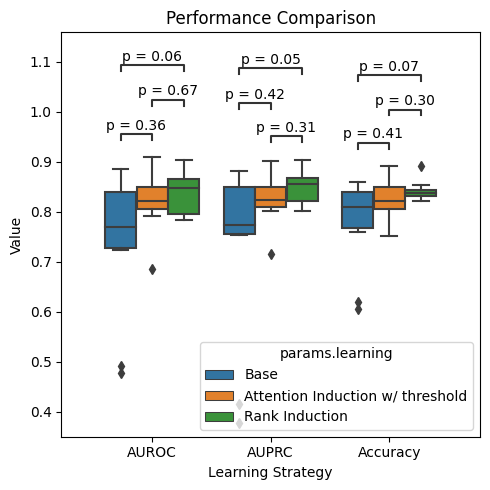

In [6]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from statannot import add_stat_annotation

base_rows = mlflow.search_runs(experiment_names=["attention_induction"], filter_string="params.learning = 'base' AND params.sampling_ratio = '1.0'")
att_rows = mlflow.search_runs(experiment_names=["attention_induction"], filter_string="params.learning = 'attention_induction' AND params.sampling_ratio = '1.0' AND params._lambda = '1.0' AND params.threshold = '1.0'")
ltr_rows = mlflow.search_runs(experiment_names=["attention_induction"], filter_string="params.learning = 'ltr' AND params.sampling_ratio = '1.0' AND params._lambda = '1.0' AND params.threshold = '1.0'")
data = pd.concat([base_rows, att_rows, ltr_rows])
data = data.loc[data["params.morphology_value"].isna()]

learning_strategy_map = {
    "base": "Base", 
    "attention_induction": "Attention Induction w/ threshold", 
    "ltr": "Rank Induction"
}
data['params.learning'] = data['params.learning'].map(learning_strategy_map)

data_view = data[["metrics.test_auroc", "metrics.test_prauc", "params.learning" ,"metrics.test_accuracy"]]
df_melted = data_view.melt(id_vars=["params.learning"], var_name="metric", value_name="value")
df_melted["metric"] = df_melted["metric"].str.replace("metrics.", "", regex=False)
df_melted["metric"] = df_melted["metric"].replace({
    "test_auroc": "AUROC", 
    "test_prauc": "AUPRC", 
    "test_accuracy": "Accuracy"
})

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.boxplot(data=df_melted, x="metric", y="value", hue="params.learning", ax=ax)

ax.set_xlabel("Learning Strategy")
ax.set_ylabel("Value")

# 필요하다면 타이틀 추가 가능
plt.title("Performance Comparison")


box_pairs = [
    (("AUROC", "Attention Induction w/ threshold"), ("AUROC", "Base")),
    (("AUROC", "Attention Induction w/ threshold"), ("AUROC", "Rank Induction")),
    (("AUROC", "Base"), ("AUROC", "Rank Induction")),
    (("AUPRC", "Attention Induction w/ threshold"), ("AUPRC", "Base")),
    (("AUPRC", "Attention Induction w/ threshold"), ("AUPRC", "Rank Induction")),
    (("AUPRC", "Base"), ("AUPRC", "Rank Induction")),
    (("Accuracy", "Attention Induction w/ threshold"), ("Accuracy", "Base")),
    (("Accuracy", "Attention Induction w/ threshold"), ("Accuracy", "Rank Induction")),
    (("Accuracy", "Base"), ("Accuracy", "Rank Induction"))
]

add_stat_annotation(ax, 
    data=df_melted, 
    x="metric", 
    y="value", 
    hue="params.learning", 
    box_pairs=box_pairs, 
    test="Mann-Whitney", 
    text_format="simple", 
    loc="inside", 
    verbose=2,
    comparisons_correction=None  # 다중 비교 보정 제거
)

plt.tight_layout()
plt.show()

<Axes: xlabel='params.sampling_ratio', ylabel='metrics.test_auroc'>

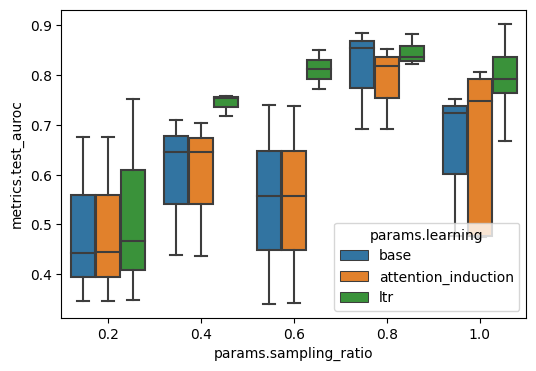

In [7]:
learning_types = ['base', 'attention_induction', 'ltr']
random_states = ['2025', '2026', '2027']

all_rows = []
for learning in learning_types:
    for random_state in random_states:
        rows = mlflow.search_runs(
            experiment_names=["attention_induction"],
            filter_string=(
                f"params.learning = '{learning}' "
                f"and params.random_state = '{random_state}' "
                f"AND params.margin = '1.0' "
            )
        )
        if 'morphology_value' in rows.columns:
            rows = rows[rows['morphology_value'].isna()]
        else:
            rows = rows
        all_rows.append(rows)


# 모든 결과를 하나의 DataFrame으로 합치기
data = pd.concat(all_rows).reset_index(drop=True)
data["params.sampling_ratio"] = data["params.sampling_ratio"].astype(float)
data_view = data[["metrics.test_auroc", "metrics.test_prauc", "params.learning", "params.sampling_ratio"]]


fig, axes = plt.subplots(figsize=(6, 4))
sns.boxplot(data=data_view, x="params.sampling_ratio", y="metrics.test_auroc", hue="params.learning")